In [11]:
def tim(data,i):    
    import pandas as pd
    import matplotlib.pyplot as plt

    a,b = data.columns[0],data.columns[1]
    data[a] = pd.to_datetime(data[a])
    data.set_index(a, inplace=True)

    window_size = 3
    moving_average = data[b].rolling(window=window_size).mean()
    cumulative_moving_average = data[b].expanding().mean()
    # Plot original time series
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[b], label='Original Time Series')

    # Plot moving average
    plt.plot(data.index, moving_average, label=f'{window_size}-Year Moving Average', color='red')
    plt.plot(data.index, cumulative_moving_average, label='Cumulative Moving Average', color='purple')

    plt.title('Time Series Analysis (India)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"graph_{i}.png")
    


59.73892857142857
28.93747138959184
10.153561737
0.6130922449777777
28.93747138959184
3.2018319237903228
-0.5133333333333333
7.56730303030303
7.3651339918571415


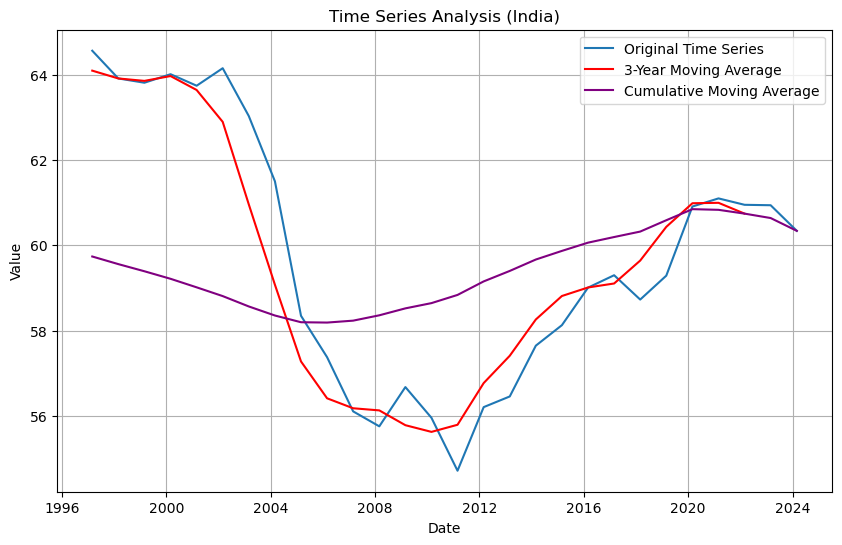

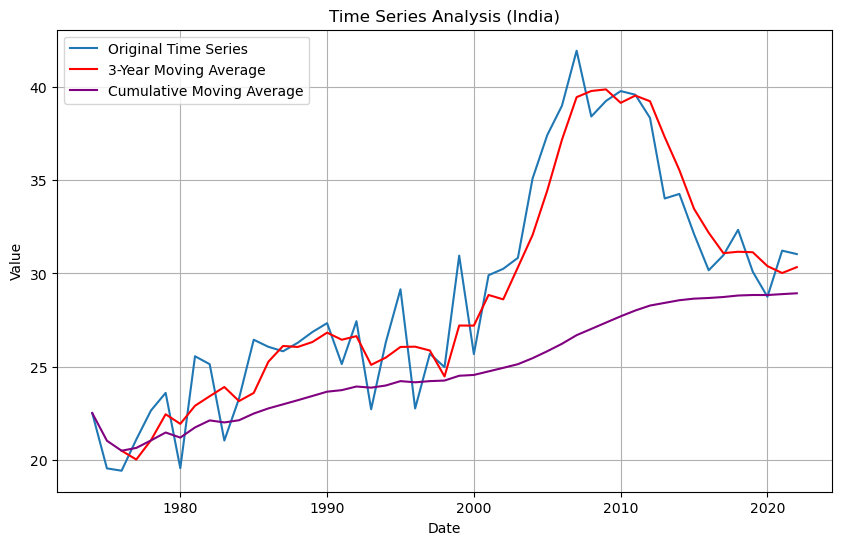

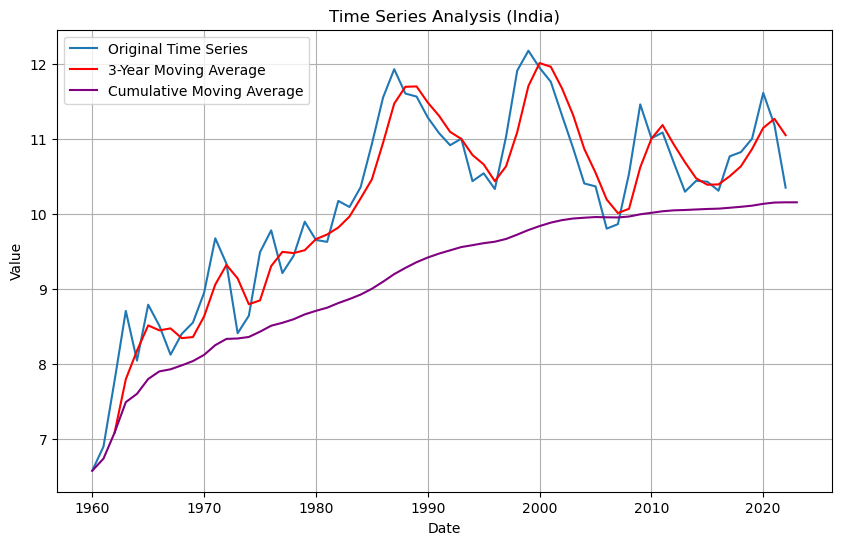

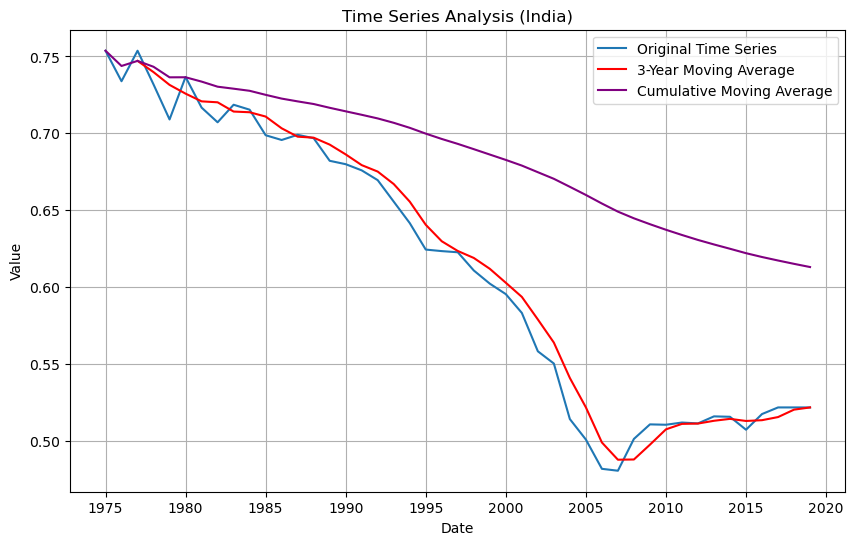

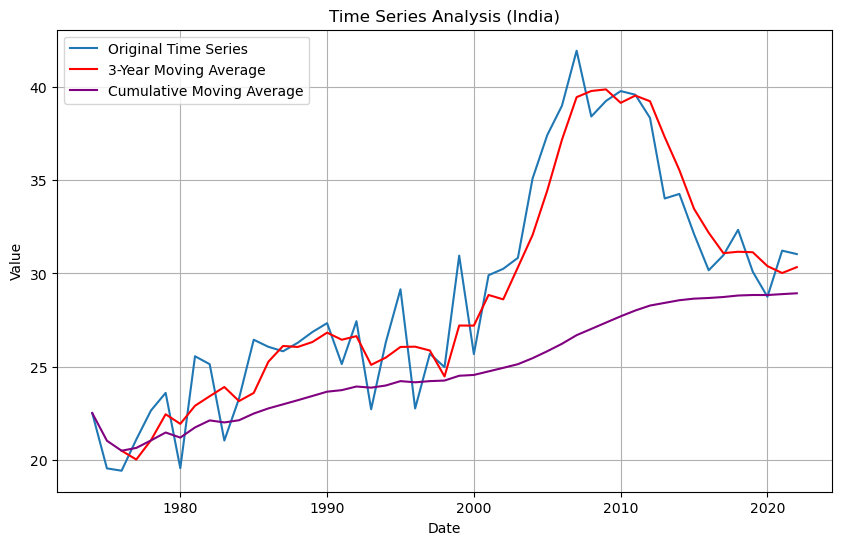

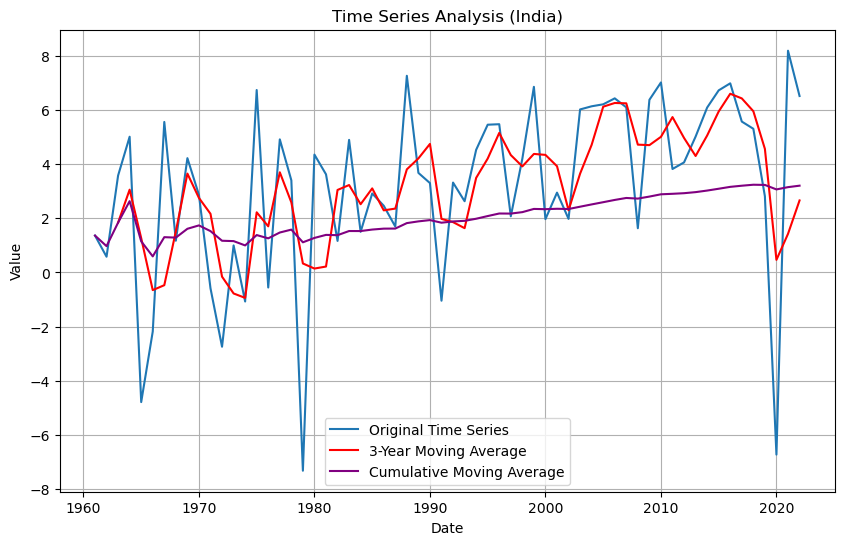

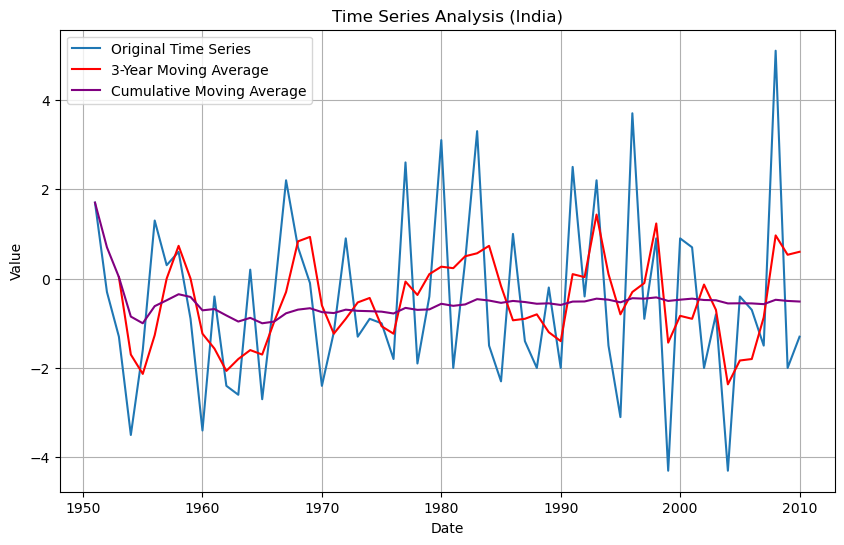

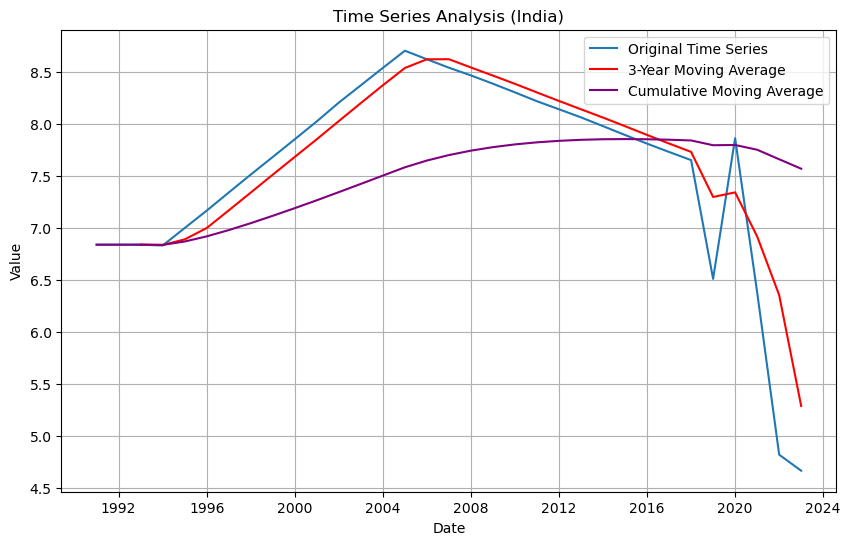

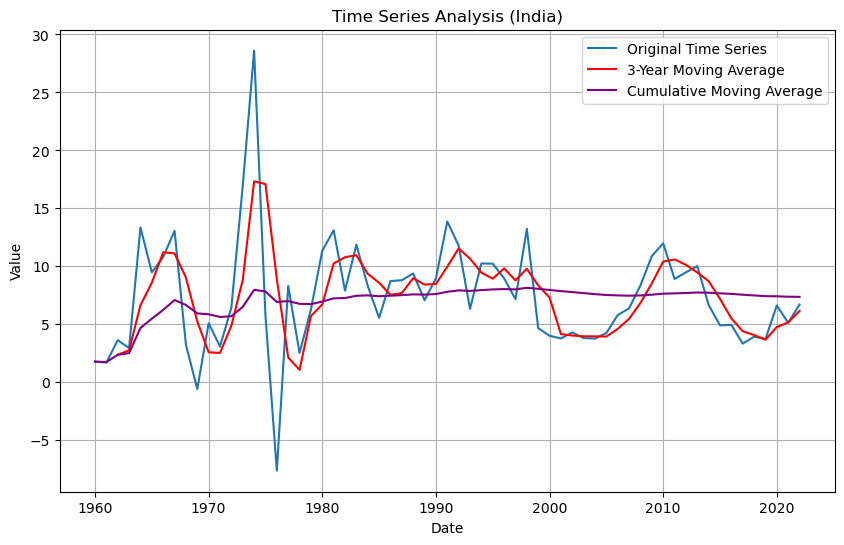

In [26]:
import pandas as pd

for i in range(1,9):
    data = pd.read_csv(f'in{i}.csv')
    tim(data,i)
data = pd.read_csv('in10.csv')
tim(data,10)

In [25]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

for i in range(1,9):
    # Load the data
    df = pd.read_csv(f'in{i}.csv', parse_dates=['Date'], dayfirst=True, index_col='Date')

    # Perform the ADF test
    result = adfuller(df['Data'])

    # Extract and print test results
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Check for stationarity based on p-value
    if result[1] < 0.05:
        print(f"Result_{i}: The time series is likely stationary (reject null hypothesis)")
    else:
        print(f"Result_{i}: The time series is likely non-stationary (fail to reject null hypothesis)")
    print(f"Avg: {df['Data'].mean()}")
    print(f"___________________________________________________________________________________________________________")

    
#10
df = pd.read_csv(f'in{10}.csv', parse_dates=['Date'], dayfirst=True, index_col='Date')

# Perform the ADF test
result = adfuller(df['Data'])

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check for stationarity based on p-value
if result[1] < 0.01:
    print(f"Result_{10}: The time series is likely stationary (reject null hypothesis)")
else:
    print(f"Result_{10}: The time series is likely non-stationary (fail to reject null hypothesis)")
print(f"Avg: {df['Data'].mean()}")
print(f"___________________________________________________________________________________________________________")

ADF Statistic: -3.6710722892911147
p-value: 0.004538945195000742
Critical Values:
   1%: -3.8326031418574136
   5%: -3.0312271701414204
   10%: -2.655519584487535
Result_1: The time series is likely stationary (reject null hypothesis)
Avg: 59.73892857142857
___________________________________________________________________________________________________________
ADF Statistic: -1.581608663580795
p-value: 0.49282515887857853
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064
Result_2: The time series is likely non-stationary (fail to reject null hypothesis)
Avg: 28.93747138959184
___________________________________________________________________________________________________________
ADF Statistic: nan
p-value: nan
Critical Values:
   1%: -3.5386953618719676
   5%: -2.9086446751210775
   10%: -2.591896782564878
Result_3: The time series is likely non-stationary (fail to reject null hypothesis)
Avg: 10.153561737
__________________________